In [1]:
import matplotlib.pyplot as plt
from lmfit.models import SineModel, DampedHarmonicOscillatorModel, PolynomialModel
from matplotlib.pyplot import show

import numpy as np
from numpy import exp, loadtxt, pi, sqrt
from numpy import exp, sin, linspace, random
import scipy
from scipy.interpolate import InterpolatedUnivariateSpline
from scipy.optimize import leastsq, curve_fit
import lmfit
from lmfit import minimize, Parameters, Parameter
from lmfit import Model
from lmfit import models

In [2]:
import pandas as pd
import numpy as np
import scipy.constants

# Read specific columns from data file:
cols = {
    0: "Ebind",  
    1: "Coord",  
}
data = pd.read_csv(
    "coord_ebind_vmd_basic.dat", sep=None, skiprows=1, usecols=cols.keys(), names=cols.values(), engine='python')

# Convert to dictionary of numpy arrays:
data = data.to_dict("series")
for key in data:
    data[key] = np.array(data[key].values)

print(data)

{'Ebind': array([ 4,  6,  8, 10, 12, 14, 16, 18, 20]), 'Coord': array([102, 210, 292, 334, 362, 387, 394, 391, 402])}


In [9]:
lmFitGraphsOn = True



''' DATA '''
xOg = data['Ebind']
yOg = data['Coord']
#sigma=[0.014,0.01,0.006,0.04,0.009,0.037,0.007,0.01,0.037,0.034,0.009,0.009,0.025,0.036,0.004,0.013,0.024,0.006,0.021]
#sigma = np.asarray(sigma)


def poly_fit(degree):
    # polynomial fit
    pModel = PolynomialModel(degree = degree)
    pParams = pModel.guess(yOg, x=xOg)
    pResult = pModel.fit(yOg, pParams, x=xOg)
                         #,weights=sigma)
    result_string = "polynomial model: \n", pResult.fit_report()
    
    return pResult, result_string


def show_results(pResult, result_string):
    print(result_string)
    plt.plot(xOg, yOg, 'o')
    plt.plot(xOg, pResult.init_fit, '--', label='initial fit')
    plt.plot(xOg, pResult.best_fit,'-', label = 'best fit')
    plt.legend()
    plt.show()
    plt.close()

('polynomial model: \n', '[[Model]]\n    Model(polynomial)\n[[Fit Statistics]]\n    # fitting method   = leastsq\n    # function evals   = 4\n    # data points      = 9\n    # variables        = 2\n    chi-square         = 17427.3333\n    reduced chi-square = 2489.61905\n    Akaike info crit   = 72.1171350\n    Bayesian info crit = 72.5115842\n    R-squared          = 0.79276365\n[[Variables]]\n    c0:  119.333333 +/- 42.0760710 (35.26%) (init = 119.3333)\n    c1:  16.6666667 +/- 3.22077822 (19.32%) (init = 16.66667)\n[[Correlations]] (unreported correlations are < 0.100)\n    C(c0, c1) = -0.919')


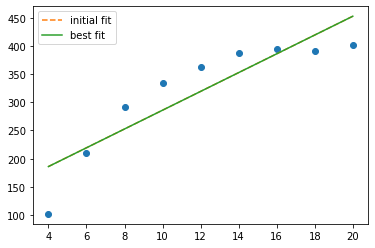

('polynomial model: \n', '[[Model]]\n    Model(polynomial)\n[[Fit Statistics]]\n    # fitting method   = leastsq\n    # function evals   = 5\n    # data points      = 9\n    # variables        = 3\n    chi-square         = 1397.19048\n    reduced chi-square = 232.865079\n    Akaike info crit   = 51.4049471\n    Bayesian info crit = 51.9966208\n    R-squared          = 0.98338537\n[[Variables]]\n    c0: -92.2857143 +/- 28.5681061 (30.96%) (init = -92.28571)\n    c1:  59.9523810 +/- 5.30926254 (8.86%) (init = 59.95238)\n    c2: -1.80357143 +/- 0.21737863 (12.05%) (init = -1.803571)\n[[Correlations]] (unreported correlations are < 0.100)\n    C(c1, c2) = -0.983\n    C(c0, c1) = -0.954\n    C(c0, c2) = 0.893')


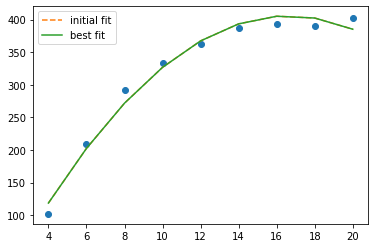

('polynomial model: \n', '[[Model]]\n    Model(polynomial)\n[[Fit Statistics]]\n    # fitting method   = leastsq\n    # function evals   = 6\n    # data points      = 9\n    # variables        = 4\n    chi-square         = 107.392496\n    reduced chi-square = 21.4784993\n    Akaike info crit   = 30.3133916\n    Bayesian info crit = 31.1022899\n    R-squared          = 0.99872295\n[[Variables]]\n    c0: -230.396825 +/- 19.8222095 (8.60%) (init = -230.3968)\n    c1:  105.704064 +/- 6.12025001 (5.79%) (init = 105.7041)\n    c2: -6.08387446 +/- 0.55628282 (9.14%) (init = -6.083874)\n    c3:  0.11889731 +/- 0.01534310 (12.90%) (init = 0.1188973)\n[[Correlations]] (unreported correlations are < 0.100)\n    C(c2, c3) = -0.993\n    C(c1, c2) = -0.989\n    C(c0, c1) = -0.977\n    C(c1, c3) = 0.965\n    C(c0, c2) = 0.939\n    C(c0, c3) = -0.899')


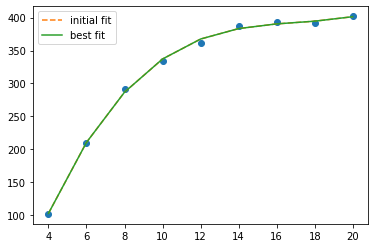

('polynomial model: \n', '[[Model]]\n    Model(polynomial)\n[[Fit Statistics]]\n    # fitting method   = leastsq\n    # function evals   = 7\n    # data points      = 9\n    # variables        = 5\n    chi-square         = 101.780109\n    reduced chi-square = 25.4450272\n    Akaike info crit   = 31.8303110\n    Bayesian info crit = 32.8164339\n    R-squared          = 0.99878969\n[[Variables]]\n    c0: -253.111111 +/- 52.9584938 (20.92%) (init = -253.1111)\n    c1:  116.002266 +/- 22.9170062 (19.76%) (init = 116.0023)\n    c2: -7.62485431 +/- 3.33653402 (43.76%) (init = -7.624854)\n    c3:  0.21155465 +/- 0.19799658 (93.59%) (init = 0.2115546)\n    c4: -0.00193036 +/- 0.00411023 (212.93%) (init = -0.001930361)\n[[Correlations]] (unreported correlations are < 0.100)\n    C(c3, c4) = -0.996\n    C(c2, c3) = -0.995\n    C(c1, c2) = -0.993\n    C(c0, c1) = -0.990\n    C(c2, c4) = 0.983\n    C(c1, c3) = 0.977\n    C(c0, c2) = 0.968\n    C(c1, c4) = -0.957\n    C(c0, c3) = -0.941\n    C(c0, 

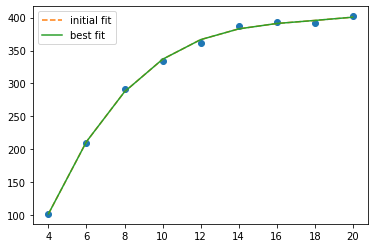

In [12]:
for deg in range (1, 5):
    pResult, result_string = poly_fit(deg)
    show_results(pResult, result_string)